In [2]:
import os
import pandas as pd
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import sys
import os
from matplotlib.image import imread
from PIL import Image

In [1]:
21446 % 32

6

In [3]:
test_images = pd.read_csv("test_dataset_info.csv", encoding='utf-8')
test_images

Unnamed: 0  Filename   Content            Family        Genus  \
0               0     77423    Entire    Amaryllidaceae    Galanthus   
1               1     29239      Leaf       Woodsiaceae     Athyrium   
2               2     36319      Leaf          Fabaceae       Cercis   
3               3     67630  LeafScan          Oleaceae     Fraxinus   
4               4     61241    Branch       Verbenaceae      Verbena   
...           ...       ...       ...               ...          ...   
21441       21441     20562    Flower  Xanthorrhoeaceae   Asphodelus   
21442       21442     30771    Entire          Fabaceae    Melilotus   
21443       21443     29220      Leaf          Rosaceae     Fragaria   
21444       21444     85874    Branch     Amaranthaceae  Chenopodium   
21445       21445     67629      Leaf      Aspleniaceae    Asplenium   

                               Species  
0                 Galanthus nivalis L.  
1      Athyrium filix-femina (L.) Roth  
2               Cercis siliquastrum L.  
3           Fraxinus angustifolia Vahl  
4               Verbena officinalis L.  
...                                ...  
21441           Asphodelus albus Mill.  
21442           Melilotus albus Medik.  
21443                Fragaria vesca L.  
21444             Chenopodium album L.  
21445         Asplenium trichomanes L.  

[21446 rows x 6 columns]

In [5]:
# Dic: dicionário de Espécie/Gênero e Família para cada id {0,1,2,...,n}.
# Bins: Agrupa os ids das imagens correspondentes à cada instância (eg., espécime). 
species_dic = []
species = test_images.Species
for i in range(len(test_images)):
    specimen = species[i]
    op = 0
    for j in range(len(species_dic)):
        if species_dic[j] == specimen:
            op = 1
    if op == 0:
        species_dic.append(specimen)
species_bins = {}
for i in range(len(species_dic)):
    species_bins[species_dic[i]] = []
for img in range(len(test_images)):
    species = test_images.Species[img]
    filename = test_images.Filename[img]
    species_bins[species].append(filename) 

genera_dic = []
genera = test_images.Genus
for i in range(len(test_images)):
    genus = genera[i]
    op = 0
    for j in range(len(genera_dic)):
        if genera_dic[j] == genus:
            op = 1
    if op == 0:
        genera_dic.append(genus)
        
genus_bins = {}
for i in range(len(genera_dic)):
    genus_bins[genera_dic[i]] = []
for img in range(len(test_images)):
    genus = test_images.Genus[img]
    filename = test_images.Filename[img]
    genus_bins[genus].append(filename) 
    
familiae_dic = []
familiae = test_images.Family
for i in range(len(test_images)):
    family = familiae[i]
    op = 0
    for j in range(len(familiae_dic)):
        if familiae_dic[j] == family:
            op = 1
    if op == 0:
        familiae_dic.append(family)
family_bins = {}
for i in range(len(familiae_dic)):
    family_bins[familiae_dic[i]] = []
for img in range(len(test_images)):
    family = test_images.Family[img]
    filename = test_images.Filename[img]
    family_bins[family].append(filename)     
    
print(len(family_bins))
print(len(genus_bins))
print(len(species_bins))

# Calcula a quantidade de imagens por espécie, gênero e família para cada instância.
species_data_distribution = []
for i in range(len(species_bins)):
    species_data_distribution.append(len(species_bins[species_dic[i]]))

add = 0
for i in range(len(species_data_distribution)):
    add = add + species_data_distribution[i]
    
genera_data_distribution = []
for i in range(len(genus_bins)):
    genera_data_distribution.append(len(genus_bins[genera_dic[i]]))

add = 0
for i in range(len(genera_data_distribution)):
    add = add + genera_data_distribution[i]

familiae_data_distribution = []
for i in range(len(family_bins)):
    familiae_data_distribution.append(len(family_bins[familiae_dic[i]]))

add = 0
for i in range(len(familiae_data_distribution)):
    add = add + familiae_data_distribution[i]

124
509
975


In [5]:
species_dic

['Galanthus nivalis L.',
 'Athyrium filix-femina (L.) Roth',
 'Cercis siliquastrum L.',
 'Fraxinus angustifolia Vahl',
 'Verbena officinalis L.',
 'Asplenium ruta-muraria L.',
 'Malva moschata L.',
 'Juglans regia L.',
 'Papaver rhoeas L.',
 'Ficus carica L.',
 'Chenopodium album L.',
 'Euphorbia serrata L.',
 'Verbascum thapsus L.',
 'Lycopus europaeus L.',
 'Anemone nemorosa L.',
 'Aconitum lycoctonum L.',
 'Epilobium tetragonum L.',
 'Alcea rosea L.',
 'Digitalis purpurea L.',
 'Cyanus segetum Hill',
 'Arum maculatum L.',
 'Meconopsis cambrica (L.) Vig.',
 'Oxalis corniculata L.',
 'Hippocrepis emerus (L.) Lassen',
 'Anemone ranunculoides L.',
 'Prenanthes purpurea L.',
 'Leucanthemopsis alpina (L.) Heywood',
 'Scabiosa columbaria L.',
 'Filipendula vulgaris Moench',
 'Euphorbia lathyris L.',
 'Crataegus monogyna Jacq.',
 'Isatis tinctoria L.',
 'Senecio inaequidens DC.',
 'Hypericum hirsutum L.',
 'Pseudorchis albida (L.) Á.Löve & D.Löve',
 'Centranthus angustifolius (Mill.) DC.',


In [4]:
species_dictionary = pd.read_csv('species_dictionary.csv',encoding='utf-8',index_col=['Species'])
genus_dictionary = pd.read_csv('genus_dictionary.csv',encoding='utf-8',index_col=['Genus'])
family_dictionary = pd.read_csv('family_dictionary.csv',encoding='utf-8',index_col=['Family'])

In [6]:
genus_dictionary.Label['Galanthus']

484

In [ ]:
species

In [14]:
import sklearn
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

species_data = pd.read_csv('species_dictionary.csv',encoding='utf-8')
genus_data = pd.read_csv('genus_dictionary.csv',encoding='utf-8')
family_data = pd.read_csv('family_dictionary.csv',encoding='utf-8')

one_hot_species = onehotencoder.fit_transform(species_data.Species.values.reshape(-1,1)).toarray()
one_hot_genus = onehotencoder.fit_transform(genus_data.Genus.values.reshape(-1,1)).toarray()
one_hot_family = onehotencoder.fit_transform(family_data.Family.values.reshape(-1,1)).toarray()

species_data_dic = pd.read_csv('species_dictionary.csv',encoding='utf-8', index_col='Species')
genus_data_dic = pd.read_csv('genus_dictionary.csv',encoding='utf-8', index_col='Genus')
family_data_dic = pd.read_csv('family_dictionary.csv',encoding='utf-8', index_col='Family')

In [31]:
image_set = []
for i in range(len(test_images)): # For each species do:
    filename = str(test_images.Filename[i])+'.jpg'
    species = str(test_images.Species[i])
    species = one_hot_species[species_data_dic.Label[species]]
    genus = str(test_images.Genus[i])
    genus = one_hot_genus[genus_data_dic.Label[genus]]
    family = str(test_images.Family[i])
    family = one_hot_family[family_data_dic.Label[family]]
    content = test_images.Content[i]    
    image_set.append((filename,species,genus,family,content))

#species_image_set = [] # Versioning
#for i in range(len(test_images)): # For each species do:
#    filename = str(test_images.Filename[i])+'.jpg'
#    species = str(test_images.Species[i])
#    content = test_images.Content[i]
#    label = species_dictionary.Label[species]
#    species_image_set.append((filename,label,content))

In [20]:
genus_image_set = []
for i in range(len(test_images)): # For each genus do:
    filename = str(test_images.Filename[i])+'.jpg'
    genus = str(test_images.Genus[i])
    label = one_hot_genus[genus_data_dic.Label[genus]]
    genus_image_set.append((filename,label))    
    
#genus_image_set = []
#for i in range(len(test_images)): # For each species do:
#    filename = str(test_images.Filename[i])+'.jpg'
#    genus = str(test_images.Genus[i])
#    label = genus_dictionary.Label[genus]
#    genus_image_set.append((filename,label))    

In [21]:
family_image_set = []
for i in range(len(test_images)): # For each species do:
    filename = str(test_images.Filename[i])+'.jpg'
    family = str(test_images.Family[i])
    label = one_hot_family[family_data_dic.Label[family]]
    family_image_set.append((filename,label))    
    
#family_image_set = []
#for i in range(len(test_images)): # For each species do:
#    filename = str(test_images.Filename[i])+'.jpg'
#    family = str(test_images.Family[i])
#    label = family_dictionary.Label[family]
#    family_image_set.append((filename,label))    

In [22]:
family_image_set

[('77423.jpg',
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.])),
 ('29239.jpg',
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0

In [23]:
species_image_set

[('77423.jpg',
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

tf.Tensor(b'Entire', shape=(), dtype=string)
tf.Tensor(b'77423.jpg', shape=(), dtype=string)


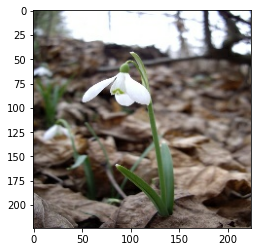

In [50]:
testing_path = 'test/test_0.tfrecord'
dataset = tf.data.TFRecordDataset(filenames=testing_path)
# Parse the dataset using a parsing function 
parsed_dataset = dataset.map(parsing_fn)
# Gets a sample from the iterator
iterator = tf.compat.v1.data.make_one_shot_iterator(parsed_dataset) 
image, species, genus,family, content, fileName = iterator.get_next()
img_array = image.numpy()
img_array = img_array.astype(np.uint8)
plt.imshow(img_array)
print(fileName)
print(content)
#print(species)
plt.show()


tf.Tensor(b'77423.jpg', shape=(), dtype=string)
tf.Tensor(b'Entire', shape=(), dtype=string)
tf.Tensor(911, shape=(), dtype=int64)


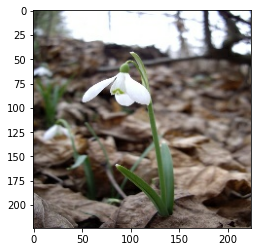

In [171]:
testing_path = 'species/test_0.tfrecord'
dataset = tf.data.TFRecordDataset(filenames=testing_path)
# Parse the dataset using a parsing function 
parsed_dataset = dataset.map(parsing_fn)
# Gets a sample from the iterator
iterator = tf.compat.v1.data.make_one_shot_iterator(parsed_dataset) 
image, species, genus,family, content,fileName = iterator.get_next()
img_array = image.numpy()
img_array = img_array.astype(np.uint8)
plt.imshow(img_array)
print(FileName)
print(Content)
#print(species)
plt.show()


In [ ]:
years = ['2013','2014','2015','2016','2017','2018','2019']
n_species = [250,500,1000,1000,10000,10000,10000]

In [39]:
backup = species_image_set # ???

species_image_set = image_set # todo remove

n_images = len(species_image_set)
n_items_by_record = 3072
n_folds = int(n_images / n_items_by_record) - 1
rest = n_images % n_items_by_record
file_path = 'test/test_{}.tfrecord'

# This was computed before so that it improves performance on the loop.
# This variable stores the distribution stopping point, that be the point
# in which the samples will stop being equally distributed over xx images per tf record
# and the rest over a single one.
distributed_total = n_images - rest

stopping_point = 0 # If some problem occur replace this for the corresponding stopping record number 
sample_index = stopping_point * n_items_by_record

for record in range(stopping_point,(n_folds+1)):
    print('Record: '+ str(record)+' from: ' + str(n_folds))
    fmt_path = file_path.format(record)
    
    limit = sample_index + n_items_by_record
    path_subset = species_image_set[sample_index : (limit)]      
    
    if record == n_folds:    
        limit = sample_index + n_items_by_record + rest
        path_subset = species_image_set[sample_index : limit]  
        print('converting from: ' + str(sample_index)+' to: ' + str(limit))
    else:    
        print('converting from: ' + str(sample_index)+' to: ' + str(limit))
    convert(path_subset, fmt_path)
    sample_index = limit


Record: 0 from: 5
converting from: 0 to: 3072
Converting to output path: test/test_0.tfrecord
- Progress: 100.0%Record: 1 from: 5
converting from: 3072 to: 6144
Converting to output path: test/test_1.tfrecord
- Progress: 100.0%Record: 2 from: 5
converting from: 6144 to: 9216
Converting to output path: test/test_2.tfrecord
- Progress: 100.0%Record: 3 from: 5
converting from: 9216 to: 12288
Converting to output path: test/test_3.tfrecord
- Progress: 100.0%Record: 4 from: 5
converting from: 12288 to: 15360
Converting to output path: test/test_4.tfrecord
- Progress: 100.0%Record: 5 from: 5
converting from: 15360 to: 21446
Converting to output path: test/test_5.tfrecord
- Progress: 100.0%

In [86]:
species_image_set[7885][0] # erro no tfrecord no.2 (imagem grayscale)

'107890.jpg'

In [96]:
species_image_set[12668][0] # erro no tfrecord no.4 (imagem não rgb)

'46720.jpg'

In [38]:
def convert(image_paths_and_labels, out_path):
    # Args:
    # image_paths   List of file-paths for the images.
    # labels        Class-labels for the images.
    # out_path      File-path for the TFRecords output file.    
    print("Converting to output path: " + out_path)    
    # Number of images. Used when printing the progress.
    num_images = len(image_paths_and_labels)    
    # Open a TFRecordWriter for the output-file.
    with tf.io.TFRecordWriter(out_path) as writer:        
        # Iterate over all the image-paths and class-labels.
        for i in range(num_images):
            # Print the percentage-progress.
            print_progress(count=i, total=num_images-1)            
            # Load the image-file using matplotlib's imread function.
            filename = image_paths_and_labels[i][0]
            # Get the label index and image name
            species = image_paths_and_labels[i][1].astype(np.int64)
            genus = image_paths_and_labels[i][2].astype(np.int64)
            family = image_paths_and_labels[i][3].astype(np.int64)
            # Concatenate path
            path = 'PlantCLEF2015TestDataWithAnnotations/'+ filename 
            # Get content
            content = image_paths_and_labels[i][4] # uncomment for handling species (class) images.
            
            # Read img
            img = imread(path)            
            # Convert the image to raw bytes. 
            try:
                img_bytes = tf.io.encode_jpeg(tf.cast(tf.image.resize(img,size=[224,224]), tf.uint8)).numpy()
            except Exception:
                if len(img.shape) == 3:
                    img = Image.open(path)
                    img = img.convert('RGB')
                    img = np.array(img)
                else:
                    img = np.stack((img,)*3, axis=-1)
                img_bytes = tf.io.encode_jpeg(tf.cast(tf.image.resize(img,size=[224,224]), tf.uint8)).numpy()
            # Create a dict with the data we want to save in the
            # TFRecords file. You can add more relevant data here.
            data = \
                {
                    'image': wrap_bytes(img_bytes),
                    'species': wrap_int64(species),
                    'genus': wrap_int64(genus),
                    'family': wrap_int64(family),
                    'content': wrap_bytes(content.encode()),
                    'fileName': wrap_bytes(filename.encode())
            }
            # Wrap the data as TensorFlow Features.
            feature = tf.train.Features(feature=data)
            # Wrap again as a TensorFlow Example.
            example = tf.train.Example(features=feature)
            # Serialize the data.
            serialized = example.SerializeToString()            
            # Write the serialized data to the TFRecords file.
            writer.write(serialized)

In [47]:
def parsing_fn(serialized):
    # Define a dict with the data-names and types we expect to
    # find in the TFRecords file.
    # It is a bit awkward that this needs to be specified again,
    # because it could have been written in the header of the
    # TFRecords file instead.
    features = \
        {
            'image': tf.io.FixedLenFeature([], tf.string),
            'species': tf.io.FixedLenFeature([1000], tf.int64),
            'genus': tf.io.FixedLenFeature([516], tf.int64),
            'family': tf.io.FixedLenFeature([124], tf.int64),        
            'content': tf.io.FixedLenFeature([], tf.string),
            'fileName': tf.io.FixedLenFeature([], tf.string),
        }

    # Parse the serialized data so we get a dict with our data.
    parsed_example = tf.io.parse_single_example(serialized=serialized,
                                             features=features)

    # Get the image as raw bytes.
    image_raw = parsed_example['image']

    # Decode the raw bytes so it becomes a tensor with type.
    image = tf.io.decode_jpeg(image_raw)
#    image = tf.io.decode_raw(image_raw, tf.uint8)
    
    # The type is now uint8 but we need it to be float.
    image = tf.cast(image, tf.float32)

    # Get the label associated with the image.
    FileName = parsed_example['fileName']

    species = parsed_example['species']
    genus = parsed_example['genus']
    family = parsed_example['family']
    
    Content = parsed_example['content']
    
    # The image and label are now correct TensorFlow types.
    return image, species, genus,family, FileName, Content

In [35]:
# Helper fns
def wrap_int64(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=value))

def wrap_float32(value):
    return tf.train.Feature(float32_list=tf.train.FloatList(value=[value]))

def wrap_bytes(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def print_progress(count, total):
    # Percentage completion.
    pct_complete = float(count) / total
    # Status-message.
    # Note the \r which means the line should overwrite itself.
    msg = "\r- Progress: {0:.1%}".format(pct_complete)
    # Print it.
    sys.stdout.write(msg)
    sys.stdout.flush()
def load_images(image_paths):
    # Load the images from disk.
    images = [imread(path) for path in image_paths]
    # Convert to a numpy array and return it.
    return np.asarray(images)